<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1
---

## Problem Statement

Working as a growth strategist for the owners of the SAT exams, College Board, which state should I recommend the non-profit to open new SAT exam centers to support the increase in demand (if any)?

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Data

### Given Data




* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

### Outside Research

According to College Board, in 2019, the SATs have __[55% of the market share.](https://newsroom.collegeboard.org/over-22-million-students-class-2019-took-sat-largest-group-ever#:~:text=Over%202.2%20Million%20Students%20in,Group%20Ever%20%7C%20The%20College%20Board)__
In the class of 2023, 1.9 million high school students took the SAT at least once, up slightly from 1.7 million in the previous year's class, according to College Board data.

### Coding Challenges

In [355]:
# Code: Manually calculate the mean.
def calculate_mean(list_of_values):
    total = 0
    count = 0
    for value in list_of_values:
        total += value
        count += 1
    return total / count if count != 0 else 0

# Test the function
test_values = [10, 20, 30, 40, 50]
print(calculate_mean(test_values))
    

30.0


In [356]:
# Code: Manually calculate the standard deviation.
def calculate_standard_deviation(list_of_values):
    mean = calculate_mean(list_of_values)
    variance = sum((x - mean) ** 2 for x in list_of_values) / len(list_of_values)
    return variance ** 0.5

# Test the function
test_values = [10, 20, 30, 40, 50]
print(calculate_standard_deviation(test_values))

14.142135623730951


In [357]:
# Code: Data cleaning function.
def percent_to_decimal(percent_in_string):
    # Remove the percent symbol and convert to float
    return float(percent_in_string.strip('%')) / 100.0

# Test the function
print(percent_to_decimal('50%'))    # Output: 0.5
print(percent_to_decimal('30.5%'))  # Output: 0.305
    

0.5
0.305


--- 
# Part 2
---

In [359]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

In [362]:
# Read in csv files: 
sat_2017 = pd.read_csv('../given_data/sat_2017.csv')
sat_2018 = pd.read_csv('../given_data/sat_2018.csv')
sat_2019 = pd.read_csv('../given_data/sat_2019.csv')
sat_2019_major = pd.read_csv('../given_data/sat_2019_by_intended_college_major.csv')

In [363]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [364]:
sat_2017.shape

(51, 5)

In [365]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [366]:
#rename columns to lowercases
sat_2017.rename(columns={"State":"state", "Participation":"participation", "Evidence-Based Reading and Writing":"ebrw", "Math":"math", "Total":"total"}, inplace=True)

In [367]:
#check work
sat_2017.columns

Index(['state', 'participation', 'ebrw', 'math', 'total'], dtype='object')

In [368]:
sat_2017['participation'] = sat_2017['participation'].map(lambda x: percent_to_decimal(x))

In [369]:
sat_2017['participation'] #checking the floats for participation column

0     0.05
1     0.38
2     0.30
3     0.03
4     0.53
5     0.11
6     1.00
7     1.00
8     1.00
9     0.83
10    0.61
11    0.55
12    0.93
13    0.09
14    0.63
15    0.02
16    0.04
17    0.04
18    0.04
19    0.95
20    0.69
21    0.76
22    1.00
23    0.03
24    0.02
25    0.03
26    0.10
27    0.03
28    0.26
29    0.96
30    0.70
31    0.11
32    0.67
33    0.49
34    0.02
35    0.12
36    0.07
37    0.43
38    0.65
39    0.71
40    0.50
41    0.03
42    0.05
43    0.62
44    0.03
45    0.60
46    0.65
47    0.64
48    0.14
49    0.03
50    0.03
Name: participation, dtype: float64

In [370]:
sat_2017.nunique()

state            51
participation    34
ebrw             46
math             46
total            48
dtype: int64

In [371]:
sat_2017.isnull().sum()

state            0
participation    0
ebrw             0
math             0
total            0
dtype: int64

In [372]:
sat_2017.info() #the participation is now a float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          51 non-null     object 
 1   participation  51 non-null     float64
 2   ebrw           51 non-null     int64  
 3   math           51 non-null     int64  
 4   total          51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [373]:
sat_2017.dtypes #from the datatypes, the participation should be a float, not an object (string)

state             object
participation    float64
ebrw               int64
math               int64
total              int64
dtype: object

#Cleaning sat_2018

In [375]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [376]:
sat_2018.shape

(51, 5)

In [377]:
sat_2018.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [378]:
#rename columns to lowercases
sat_2018.rename(columns={"State":"state", "Participation":"participation", "Evidence-Based Reading and Writing":"ebrw", "Math":"math", "Total":"total"}, inplace=True)

In [379]:
sat_2018.columns

Index(['state', 'participation', 'ebrw', 'math', 'total'], dtype='object')

In [380]:
sat_2018['participation'] = sat_2018['participation'].map(lambda x: percent_to_decimal(x))

In [381]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          51 non-null     object 
 1   participation  51 non-null     float64
 2   ebrw           51 non-null     int64  
 3   math           51 non-null     int64  
 4   total          51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [382]:
sat_2018.nunique()

state            51
participation    33
ebrw             39
math             46
total            47
dtype: int64

In [383]:
sat_2018.isnull().sum()

state            0
participation    0
ebrw             0
math             0
total            0
dtype: int64

In [384]:
#Cleaning 2019

In [385]:
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [386]:
sat_2019.shape #There are too many states in the states column! 53 instead of 51. We have to find them.

(53, 5)

In [387]:
sat_2019.columns

Index(['State', 'Participation Rate', 'EBRW', 'Math', 'Total'], dtype='object')

In [388]:
#rename columns to lowercases
sat_2019.rename(columns={"State":"state", "Participation Rate":"participation", "EBRW":"ebrw", "Math":"math", "Total":"total"}, inplace=True)

In [389]:
sat_2019.columns

Index(['state', 'participation', 'ebrw', 'math', 'total'], dtype='object')

In [390]:
sat_2019.nunique()

state            53
participation    28
ebrw             46
math             46
total            49
dtype: int64

In [391]:
sat_2019.isnull().sum()

state            0
participation    0
ebrw             0
math             0
total            0
dtype: int64

In [392]:
sat_2019 = sat_2019[sat_2019['participation']!= "—"].reset_index(drop=True) #we need the reindex because the indexes are not 52, we need to change it back to 51.

In [393]:
#make participation% and there was a ValueError: could not convert string to float: '—' error because of the presence of a strange string.
sat_2019['participation'] = sat_2019['participation'].map(lambda x: percent_to_decimal(x)) 

In [394]:
sat_2019['participation']  #checking for the string, the string is a "—"

0     0.07
1     0.41
2     0.31
3     0.06
4     0.63
5     1.00
6     1.00
7     1.00
8     0.94
9     1.00
10    0.71
11    0.54
12    1.00
13    1.00
14    0.66
15    0.03
16    0.04
17    0.04
18    0.05
19    0.99
20    0.82
21    0.81
22    1.00
23    0.04
24    0.03
25    0.04
26    0.09
27    0.03
28    0.20
29    0.95
30    0.82
31    0.18
32    0.79
33    0.51
34    0.02
35    0.19
36    0.22
37    0.51
38    0.70
39    1.00
40    0.68
41    0.03
42    0.07
43    0.68
44    0.04
45    0.66
46    0.68
47    0.70
48    0.99
49    0.03
50    0.03
Name: participation, dtype: float64

In [395]:
sat_2019

,state,participation,ebrw,math,total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065
5,Colorado,1.00,518,506,1024
6,Connecticut,1.00,529,516,1046
7,Delaware,1.00,499,486,985
8,District of Columbia,0.94,495,480,975
9,Florida,1.00,516,483,999


In [396]:
sat_2019.shape

(51, 5)

In [397]:
sat_2019['participation'].unique()

array([0.07, 0.41, 0.31, 0.06, 0.63, 1.  , 0.94, 0.71, 0.54, 0.66, 0.03,
       0.04, 0.05, 0.99, 0.82, 0.81, 0.09, 0.2 , 0.95, 0.18, 0.79, 0.51,
       0.02, 0.19, 0.22, 0.7 , 0.68])

In [398]:
sat_2017.describe().round(2) #Notice that the min score 52 for Math is too low as the range is 200-800. thus I decided to check that row for the correct range.

,participation,ebrw,math,total
count,51.00,51.00,51.00,51.00
mean,0.40,569.12,547.63,1126.10
std,0.35,45.67,84.91,92.49
min,0.02,482.00,52.00,950.00
25%,0.04,533.50,522.00,1055.50
50%,0.38,559.00,548.00,1107.00
75%,0.66,613.00,599.00,1212.00
max,1.00,644.00,651.00,1295.00


In [399]:
sat_2018.describe().round(2)

,participation,ebrw,math,total
count,51.00,51.00,51.00,51.00
mean,0.46,563.69,556.24,1120.02
std,0.37,47.50,47.77,94.16
min,0.02,480.00,480.00,977.00
25%,0.04,534.50,522.50,1057.50
50%,0.52,552.00,544.00,1098.00
75%,0.78,610.50,593.50,1204.00
max,1.00,643.00,655.00,1298.00


In [400]:
sat_2019.describe().round(2)

,participation,ebrw,math,total
count,51.00,51.00,51.00,51.00
mean,0.49,560.80,552.20,1113.08
std,0.39,46.25,51.29,97.20
min,0.02,483.00,460.00,943.00
25%,0.06,527.50,511.50,1038.00
50%,0.54,550.00,546.00,1097.00
75%,0.82,612.00,599.00,1210.00
max,1.00,636.00,648.00,1284.00


In [401]:
sat_2019['participation'].dtypes

dtype('float64')

In [402]:
sat_2017['math'].value_counts() #notice that only 1 row had too low data thus we must check the entire row for math=52, it could be a typo!

math
553    2
524    2
551    2
604    2
541    2
572    1
570    1
625    1
520    1
526    1
561    1
523    1
535    1
621    1
531    1
517    1
548    1
631    1
521    1
603    1
507    1
614    1
534    1
528    1
591    1
651    1
607    1
533    1
594    1
595    1
512    1
492    1
468    1
497    1
515    1
493    1
556    1
532    1
635    1
628    1
616    1
586    1
499    1
52     1
495    1
649    1
Name: count, dtype: int64

In [403]:
sat_2017.head(23) #checking that the value appeared in row 20, Maryland, we can infer that it was a typo as we have the total column. ebrw+math=total
#thus, I replaced the Maryland math score 52 to 524 since 1060-536 =524.

,state,participation,ebrw,math,total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055
5,Colorado,0.11,606,595,1201
6,Connecticut,1.00,530,512,1041
7,Delaware,1.00,503,492,996
8,District of Columbia,1.00,482,468,950
9,Florida,0.83,520,497,1017


In [404]:
sat_2017.loc[20, 'math'] = 524

In [405]:
sat_2017.head(23)

,state,participation,ebrw,math,total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055
5,Colorado,0.11,606,595,1201
6,Connecticut,1.00,530,512,1041
7,Delaware,1.00,503,492,996
8,District of Columbia,1.00,482,468,950
9,Florida,0.83,520,497,1017


In [406]:
sat_2017.describe().round(2) #the more plausible math min. score is now 468.00.

,participation,ebrw,math,total
count,51.00,51.00,51.00,51.00
mean,0.40,569.12,556.88,1126.10
std,0.35,45.67,47.12,92.49
min,0.02,482.00,468.00,950.00
25%,0.04,533.50,523.50,1055.50
50%,0.38,559.00,548.00,1107.00
75%,0.66,613.00,599.00,1212.00
max,1.00,644.00,651.00,1295.00


In [407]:
#to check if all the scores are added up properly, I do this to sat_2017, sat_2018, and sat_2019 scores. ebrw+math =total.

In [408]:
#checking_scores ---> sat_2017['ebrw']+ sat_2017['math'] == sat_2017[total])

# New column for the sum of 'ebrw' and 'math'
sat_2017['calculated_total'] = sat_2017['ebrw'] + sat_2017['math']

# Check if the calculated total matches the 'total' column
sat_2017['is_correct'] = sat_2017['calculated_total'] == sat_2017['total']

# Display rows where the total is incorrect
incorrect_totals = sat_2017[sat_2017['is_correct'] == False]

print("\nRows with incorrect totals:\n", incorrect_totals)
#Thus, there are 15 incorrect totals for the following rows: I will replace them with the correct total.


Rows with incorrect totals:
             state  participation  ebrw  math  total  calculated_total  \
6     Connecticut           1.00   530   512   1041              1042   
7        Delaware           1.00   503   492    996               995   
12          Idaho           0.93   513   493   1005              1006   
15           Iowa           0.02   641   635   1275              1276   
18      Louisiana           0.04   611   586   1198              1197   
21  Massachusetts           0.76   555   551   1107              1106   
22       Michigan           1.00   509   495   1005              1004   
24    Mississippi           0.02   634   607   1242              1241   
27       Nebraska           0.03   629   625   1253              1254   
32       New York           0.67   528   523   1052              1051   
35           Ohio           0.12   578   570   1149              1148   
39   Rhode Island           0.71   539   524   1062              1063   
41   South Dakota    

In [409]:
#In sat_2017 there are only 15 rows to clean, and the total values are only off by 1 point. Thus, it was probably due to rounding a number up or down.

In [410]:
#checking_scores ---> sat_2018['ebrw']+ sat_2018['math'] == sat_2018[total])

# New column for the sum of 'ebrw' and 'math'
sat_2018['calculated_total'] = sat_2018['ebrw'] + sat_2018['math']

# Check if the calculated total matches the 'total' column
sat_2018['is_correct'] = sat_2018['calculated_total'] == sat_2018['total']

# Display rows where the total is incorrect
incorrect_totals = sat_2018[sat_2018['is_correct'] == False]

print("\nRows with incorrect totals:\n", incorrect_totals)


Rows with incorrect totals:
              state  participation  ebrw  math  total  calculated_total  \
3         Arkansas           0.05   592   576   1169              1168   
6      Connecticut           1.00   535   519   1053              1054   
7         Delaware           1.00   505   492    998               997   
16          Kansas           0.04   633   631   1265              1264   
22        Michigan           1.00   511   499   1011              1010   
31      New Mexico           0.16   552   540   1093              1092   
33  North Carolina           0.52   554   543   1098              1097   
45         Vermont           0.64   565   554   1120              1119   
50         Wyoming           0.03   633   625   1257              1258   

    is_correct  
3        False  
6        False  
7        False  
16       False  
22       False  
31       False  
33       False  
45       False  
50       False  


In [411]:
#checking_scores ---> sat_2019['ebrw']+ sat_2019['math'] == sat_2019[total])

# New column for the sum of 'ebrw' and 'math'
sat_2019['calculated_total'] = sat_2019['ebrw'] + sat_2019['math']

# Check if the calculated total matches the 'total' column
sat_2019['is_correct'] = sat_2019['calculated_total'] == sat_2019['total']

# Display rows where the total is incorrect
incorrect_totals = sat_2019[sat_2019['is_correct'] == False]

print("\nRows with incorrect totals:\n", incorrect_totals)


Rows with incorrect totals:
           state  participation  ebrw  math  total  calculated_total  \
6   Connecticut           1.00   529   516   1046              1045   
10      Georgia           0.71   538   519   1058              1057   
18    Louisiana           0.05   610   591   1200              1201   
19        Maine           0.99   512   502   1013              1014   
24  Mississippi           0.03   628   608   1237              1236   
25     Missouri           0.04   622   615   1236              1237   
27     Nebraska           0.03   628   631   1260              1259   
30   New Jersey           0.82   544   545   1090              1089   
35         Ohio           0.19   550   548   1097              1098   
36     Oklahoma           0.22   490   472    963               962   
44         Utah           0.04   614   615   1230              1229   
46     Virginia           0.68   567   551   1119              1118   

    is_correct  
6        False  
10       Fal

In [412]:
# So, my choice is not to change the SAT maths or SAT ebrw scores as I assume these were marked correctly, 
# but I will adjust the total to become the calculated_total instead.
sat_2017['total'] = sat_2017['calculated_total'].copy()
sat_2018['total'] = sat_2018['calculated_total'].copy()
sat_2019['total'] = sat_2019['calculated_total'].copy()

In [413]:
#Next, check the unique values for the states in case they are not spelled correctly.

In [414]:
#rechecking_scores ---> sat_2019['ebrw']+ sat_2019['math'] == sat_2019[total])

# New column for the sum of 'ebrw' and 'math'
sat_2019['calculated_total'] = sat_2019['ebrw'] + sat_2019['math']

# Check if the calculated total matches the 'total' column
sat_2019['is_correct'] = sat_2019['calculated_total'] == sat_2019['total']

# Display rows where the total is incorrect
incorrect_totals = sat_2019[sat_2019['is_correct'] == False]

print("\nRows with incorrect totals:\n", incorrect_totals)


Rows with incorrect totals:
 Empty DataFrame
Columns: [state, participation, ebrw, math, total, calculated_total, is_correct]
Index: []


In [415]:
sat_2017['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [416]:
sat_2018['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Oklahoma', 'Ohio', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [417]:
sat_2019['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [418]:
#Thus, in 2017, 2018, 2019 the 50 states plus district of Columbia are spelled correctly

In [419]:
#top 10 states 2017 according to total
sat_2017.sort_values('total', ascending=False).head(10)

,state,participation,ebrw,math,total,calculated_total,is_correct
23,Minnesota,0.03,644,651,1295,1295,True
49,Wisconsin,0.03,642,649,1291,1291,True
15,Iowa,0.02,641,635,1276,1276,False
25,Missouri,0.03,640,631,1271,1271,True
16,Kansas,0.04,632,628,1260,1260,True
34,North Dakota,0.02,635,621,1256,1256,True
27,Nebraska,0.03,629,625,1254,1254,False
17,Kentucky,0.04,631,616,1247,1247,True
24,Mississippi,0.02,634,607,1241,1241,False
44,Utah,0.03,624,614,1238,1238,True


In [420]:
sat_2018.sort_values('total', ascending=False).head(10)

,state,participation,ebrw,math,total,calculated_total,is_correct
23,Minnesota,0.04,643,655,1298,1298,True
49,Wisconsin,0.03,641,653,1294,1294,True
34,North Dakota,0.02,640,643,1283,1283,True
15,Iowa,0.03,634,631,1265,1265,True
16,Kansas,0.04,633,631,1264,1264,False
25,Missouri,0.04,633,629,1262,1262,True
50,Wyoming,0.03,633,625,1258,1258,False
27,Nebraska,0.03,629,623,1252,1252,True
17,Kentucky,0.04,630,618,1248,1248,True
41,South Dakota,0.03,622,618,1240,1240,True


In [421]:
sat_2019.sort_values('total', ascending=False).head(10)

,state,participation,ebrw,math,total,calculated_total,is_correct
23,Minnesota,0.04,636,648,1284,1284,True
49,Wisconsin,0.03,635,648,1283,1283,True
41,South Dakota,0.03,633,635,1268,1268,True
34,North Dakota,0.02,627,636,1263,1263,True
27,Nebraska,0.03,628,631,1259,1259,True
15,Iowa,0.03,622,622,1244,1244,True
16,Kansas,0.04,618,623,1241,1241,True
50,Wyoming,0.03,623,615,1238,1238,True
25,Missouri,0.04,622,615,1237,1237,True
24,Mississippi,0.03,628,608,1236,1236,True


In [422]:
# I observed that the participation rate is low, probably leading to the highest total score. Thus, I sort by participation rate.
sat_2017.sort_values('participation', ascending=False).head(10)

,state,participation,ebrw,math,total,calculated_total,is_correct
8,District of Columbia,1.00,482,468,950,950,True
22,Michigan,1.00,509,495,1004,1004,False
6,Connecticut,1.00,530,512,1042,1042,False
7,Delaware,1.00,503,492,995,995,False
29,New Hampshire,0.96,532,520,1052,1052,True
19,Maine,0.95,513,499,1012,1012,True
12,Idaho,0.93,513,493,1006,1006,False
9,Florida,0.83,520,497,1017,1017,True
21,Massachusetts,0.76,555,551,1106,1106,False
39,Rhode Island,0.71,539,524,1063,1063,False


In [423]:
sat_2018.sort_values('participation', ascending=False).head(10)

,state,participation,ebrw,math,total,calculated_total,is_correct
5,Colorado,1.00,519,506,1025,1025,True
6,Connecticut,1.00,535,519,1054,1054,False
7,Delaware,1.00,505,492,997,997,False
22,Michigan,1.00,511,499,1010,1010,False
12,Idaho,1.00,508,493,1001,1001,True
19,Maine,0.99,512,501,1013,1013,True
13,Illinois,0.99,513,506,1019,1019,True
39,Rhode Island,0.97,513,505,1018,1018,True
29,New Hampshire,0.96,535,528,1063,1063,True
8,District of Columbia,0.92,497,480,977,977,True


In [424]:
sat_2019.sort_values('participation', ascending=False).head(10)

,state,participation,ebrw,math,total,calculated_total,is_correct
39,Rhode Island,1.00,503,492,995,995,True
13,Illinois,1.00,509,504,1013,1013,True
22,Michigan,1.00,507,496,1003,1003,True
5,Colorado,1.00,518,506,1024,1024,True
6,Connecticut,1.00,529,516,1045,1045,True
7,Delaware,1.00,499,486,985,985,True
9,Florida,1.00,516,483,999,999,True
12,Idaho,1.00,505,488,993,993,True
19,Maine,0.99,512,502,1014,1014,True
48,West Virginia,0.99,483,460,943,943,True


In [425]:
#thus the participation rate seems to be very low for the top 10 best total scores. So, I used both conditions to judge the best states?
sat_2017.sort_values(['participation', 'total'], ascending=[False, False]).head(10)

,state,participation,ebrw,math,total,calculated_total,is_correct
6,Connecticut,1.00,530,512,1042,1042,False
22,Michigan,1.00,509,495,1004,1004,False
7,Delaware,1.00,503,492,995,995,False
8,District of Columbia,1.00,482,468,950,950,True
29,New Hampshire,0.96,532,520,1052,1052,True
19,Maine,0.95,513,499,1012,1012,True
12,Idaho,0.93,513,493,1006,1006,False
9,Florida,0.83,520,497,1017,1017,True
21,Massachusetts,0.76,555,551,1106,1106,False
39,Rhode Island,0.71,539,524,1063,1063,False


In [426]:
sat_2018.sort_values(['participation', 'total'], ascending=[False, False]).head(10)

,state,participation,ebrw,math,total,calculated_total,is_correct
6,Connecticut,1.00,535,519,1054,1054,False
5,Colorado,1.00,519,506,1025,1025,True
22,Michigan,1.00,511,499,1010,1010,False
12,Idaho,1.00,508,493,1001,1001,True
7,Delaware,1.00,505,492,997,997,False
13,Illinois,0.99,513,506,1019,1019,True
19,Maine,0.99,512,501,1013,1013,True
39,Rhode Island,0.97,513,505,1018,1018,True
29,New Hampshire,0.96,535,528,1063,1063,True
8,District of Columbia,0.92,497,480,977,977,True


In [427]:
sat_2019.sort_values(['participation', 'total'], ascending=[False, False]).head(10)

,state,participation,ebrw,math,total,calculated_total,is_correct
6,Connecticut,1.00,529,516,1045,1045,True
5,Colorado,1.00,518,506,1024,1024,True
13,Illinois,1.00,509,504,1013,1013,True
22,Michigan,1.00,507,496,1003,1003,True
9,Florida,1.00,516,483,999,999,True
39,Rhode Island,1.00,503,492,995,995,True
12,Idaho,1.00,505,488,993,993,True
7,Delaware,1.00,499,486,985,985,True
19,Maine,0.99,512,502,1014,1014,True
48,West Virginia,0.99,483,460,943,943,True


In [428]:
#filter states with greater than 80% participation
sat_2017[sat_2017['participation'] >0.8]

,state,participation,ebrw,math,total,calculated_total,is_correct
6,Connecticut,1.00,530,512,1042,1042,False
7,Delaware,1.00,503,492,995,995,False
8,District of Columbia,1.00,482,468,950,950,True
9,Florida,0.83,520,497,1017,1017,True
12,Idaho,0.93,513,493,1006,1006,False
19,Maine,0.95,513,499,1012,1012,True
22,Michigan,1.00,509,495,1004,1004,False
29,New Hampshire,0.96,532,520,1052,1052,True


### Data Dictionary



|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|sat_2017|The name of the states in the US, there are 50 states in total. + 1 extra state: District of Colombia| 
|**participation**|*float*|sat_2017|The percentage of the participation rate of each state.|
|**ebrw**|*int*|sat_2017|The English section score (score range = 200-800).| 
|**math**|*int*|sat_2017|The Math section score (score range = 200-800).| 
|**total**|*int*|sat_2017|The total final weighted score by adding the verbal 'ebrw' and 'math' scores.| 

## Exploratory Data Analysis

In [432]:
sat_2017.dtypes

state                object
participation       float64
ebrw                  int64
math                  int64
total                 int64
calculated_total      int64
is_correct             bool
dtype: object

In [433]:
#Code: Create a standard deviation function. 
def create_std(items):
    sdev = np.mean(items)
    return np.sqrt(sum([(value -sdev)**2 for value in values])/len(values))

#sd= sat_2017.apply(lambda x: create_std(x))

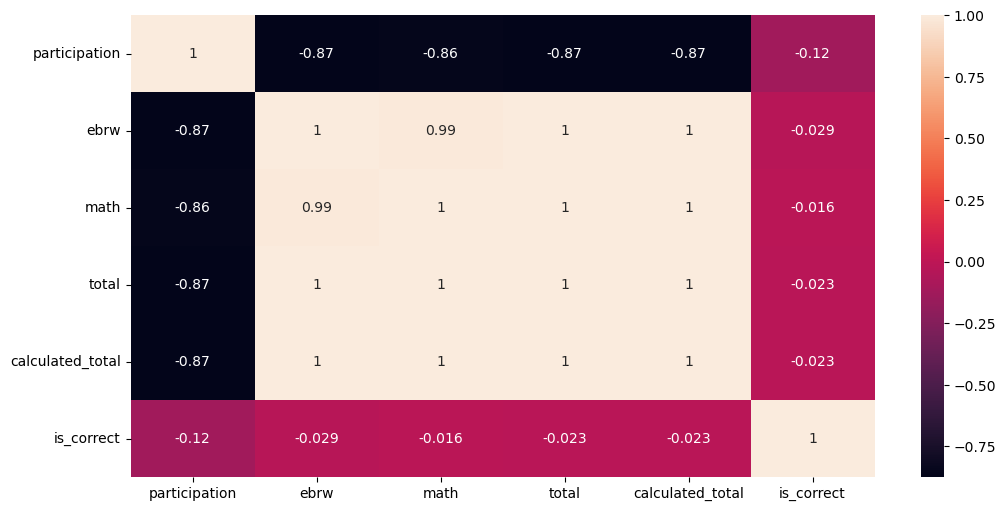

In [434]:
plt.figure(figsize=(12,6))
sns.heatmap(sat_2017.corr(numeric_only=True), annot=True);

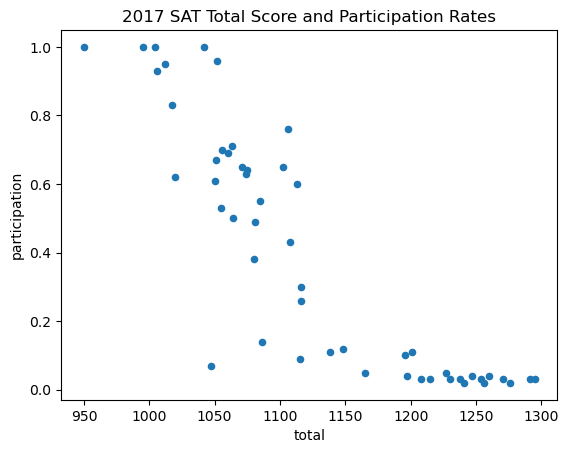

In [435]:
#I want to plot participation rate with score
sat_2017.plot(x='total', y = 'participation', kind='scatter', title='2017 SAT Total Score and Participation Rates');

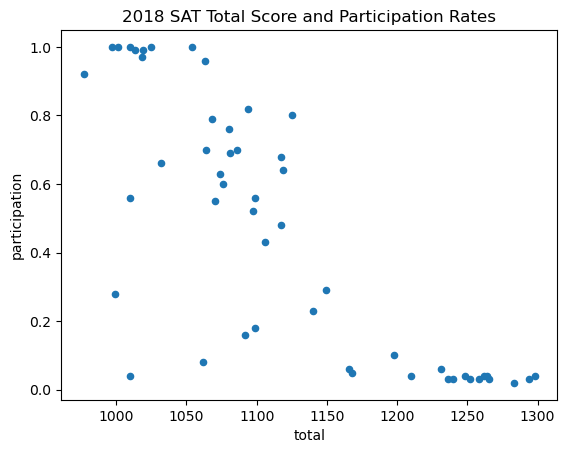

In [436]:
sat_2018.plot(x='total', y = 'participation', kind='scatter', title='2018 SAT Total Score and Participation Rates');

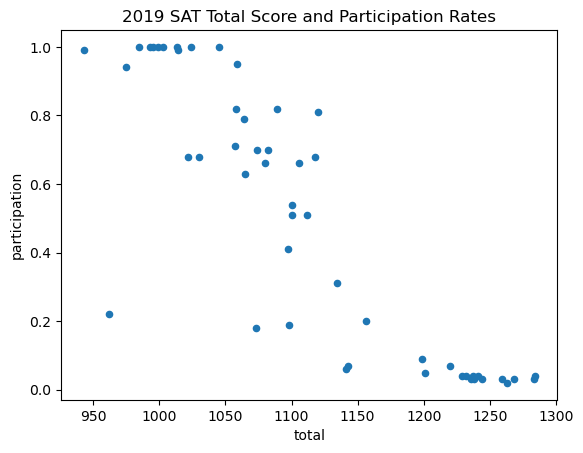

In [437]:
sat_2019.plot(x='total', y = 'participation', kind='scatter', title='2019 SAT Total Score and Participation Rates');

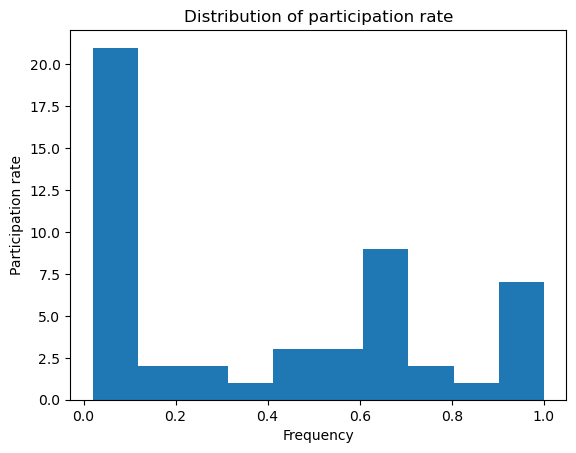

In [438]:
plt.hist(sat_2017['participation']);
plt.title('Distribution of participation rate');
plt.ylabel('Participation rate');
plt.xlabel('Frequency');

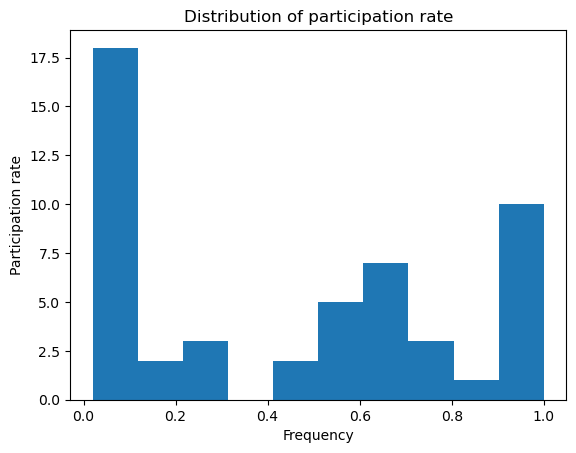

In [439]:
plt.hist(sat_2018['participation']);
plt.title('Distribution of participation rate');
plt.ylabel('Participation rate');
plt.xlabel('Frequency');

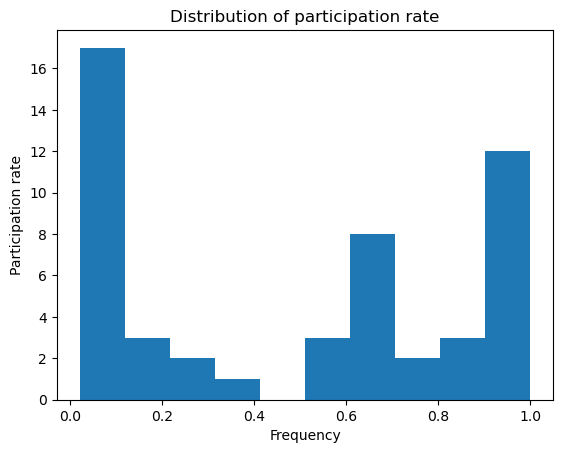

In [440]:
plt.hist(sat_2019['participation']);
plt.title('Distribution of participation rate');
plt.ylabel('Participation rate');
plt.xlabel('Frequency');

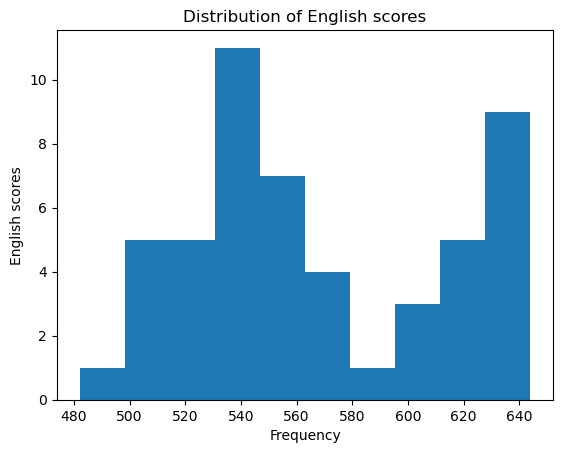

In [441]:
plt.hist(sat_2017['ebrw']);
plt.title('Distribution of English scores');
plt.ylabel('English scores');
plt.xlabel('Frequency');

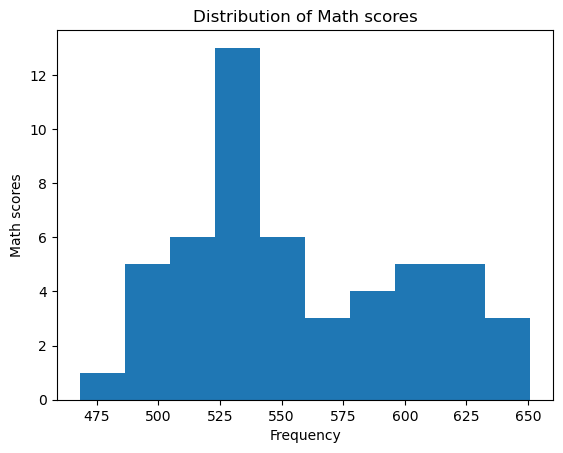

In [442]:
plt.hist(sat_2017['math']);
plt.title('Distribution of Math scores');
plt.ylabel('Math scores');
plt.xlabel('Frequency');

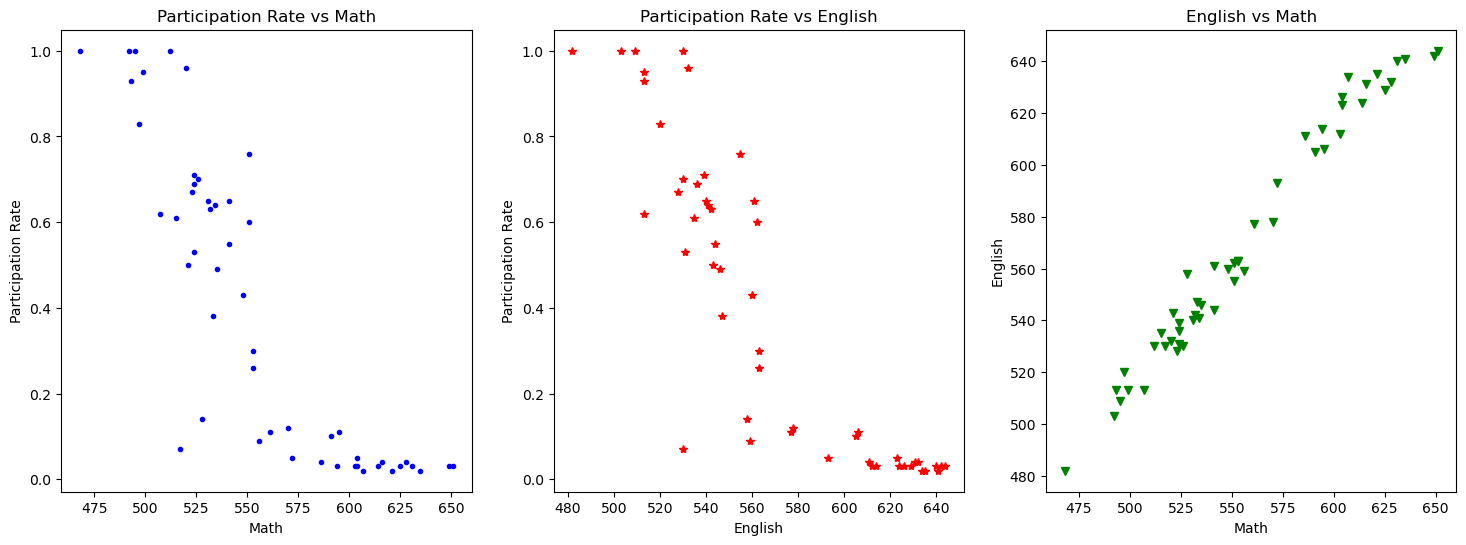

In [443]:
# using just matplotlib and the dictionary of numbers
fig, axs = plt.subplots(1,3, figsize=(18,6))

axs[0].plot(sat_2017['math'], sat_2017['participation'], 'b.');
axs[0].set_title('Participation Rate vs Math');
axs[0].set_ylabel('Participation Rate');
axs[0].set_xlabel('Math');

axs[1].plot(sat_2017['ebrw'], sat_2017['participation'], 'r*');
axs[1].set_title('Participation Rate vs English');
axs[1].set_ylabel('Participation Rate');
axs[1].set_xlabel('English');

axs[2].plot(sat_2017['math'], sat_2017['ebrw'], 'gv');
axs[2].set_title('English vs Math');
axs[2].set_ylabel('English');
axs[2].set_xlabel('Math');

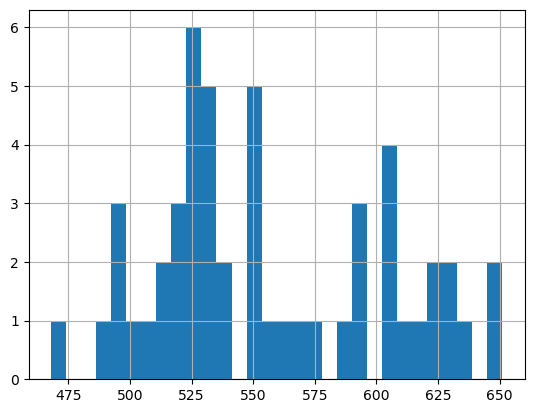

In [444]:
sat_2017['math'].hist(bins=30)
plt.show()

In [445]:
sat_2019_major.head()

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",12%,1072,534,537


In [446]:
sat_2019_major.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   IntendedCollegeMajor  38 non-null     object
 1   TestTakers            38 non-null     object
 2   Percent               38 non-null     object
 3   Total                 38 non-null     int64 
 4   ReadingWriting        38 non-null     int64 
 5   Math                  38 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ KB


In [447]:
sat_2019_major.columns

Index(['IntendedCollegeMajor', 'TestTakers', 'Percent', 'Total',
       'ReadingWriting', 'Math'],
      dtype='object')

In [448]:
#rename columns
sat_2019_major.rename(columns={'IntendedCollegeMajor':'major', 'TestTakers':'test_takers', 'Percent':'percent', 'Total': 'total', 'ReadingWriting':'ebrw', 'Math':'math'}, inplace=True)

In [449]:
sat_2019_major.columns

Index(['major', 'test_takers', 'percent', 'total', 'ebrw', 'math'], dtype='object')

In [450]:
sat_2019_major.shape

(38, 6)

In [451]:
sat_2019_major.nunique()

major          38
test_takers    38
percent         9
total          35
ebrw           35
math           35
dtype: int64

In [452]:
sat_2019_major.isnull().sum()

major          0
test_takers    0
percent        0
total          0
ebrw           0
math           0
dtype: int64

In [453]:
#change the string objects : 'test_takers' column to int and 'percent' column to float
sat_2019_major['test_takers'].unique() #there are commas on the numbers, thus, we need to convert them to int and remove the commas. 


array(['24,913', '28,988', '2,629', '155,834', '221,523', '36,332',
       '79,736', '2,500', '71,882', '194,127', '33,595', '16,233',
       '6,469', '9,936', '331,026', '12,611', '35,788', '8,611', '283',
       '16,508', '6,592', '7,448', '2,979', '10,147', '13,039', '6,668',
       '3,381', '26,318', '319', '75,626', '7,852', '68,177', '33,356',
       '1,991', '1,105', '130,642', '26,888', '126,939'], dtype=object)

In [454]:
sat_2019_major['test_takers'] = sat_2019_major['test_takers'].str.replace(',', '').astype(int)

In [455]:
sat_2019_major['test_takers'].unique()

array([ 24913,  28988,   2629, 155834, 221523,  36332,  79736,   2500,
        71882, 194127,  33595,  16233,   6469,   9936, 331026,  12611,
        35788,   8611,    283,  16508,   6592,   7448,   2979,  10147,
        13039,   6668,   3381,  26318,    319,  75626,   7852,  68177,
        33356,   1991,   1105, 130642,  26888, 126939])

In [456]:
sat_2019_major['percent'] = sat_2019_major['percent'].map(lambda x: percent_to_decimal(x))

In [457]:
sat_2019_major['percent'].unique() # i did not understand percent, thus I discovered that it is just the ratio of test-takers for each major, thus i will rename the column

array([0.01, 0.02, 0.  , 0.08, 0.12, 0.04, 0.11, 0.18, 0.07])

In [458]:
#rename column 'percent' to 'percent_takers' i.e. test takers taking each major
sat_2019_major.rename(columns={'IntendedCollegeMajor':'major', 'TestTakers':'test_takers', 'percent':'percent_takers', 'Total': 'total', 'ReadingWriting':'ebrw', 'Math':'math'}, inplace=True)

In [459]:
sat_2019_major.columns

Index(['major', 'test_takers', 'percent_takers', 'total', 'ebrw', 'math'], dtype='object')

In [460]:
sat_2019_major['percent_takers']

0     0.01
1     0.02
2     0.00
3     0.08
4     0.12
5     0.02
6     0.04
7     0.00
8     0.04
9     0.11
10    0.02
11    0.01
12    0.00
13    0.01
14    0.18
15    0.01
16    0.02
17    0.00
18    0.00
19    0.01
20    0.00
21    0.00
22    0.00
23    0.01
24    0.01
25    0.00
26    0.00
27    0.01
28    0.00
29    0.04
30    0.00
31    0.04
32    0.02
33    0.00
34    0.00
35    0.07
36    0.01
37    0.07
Name: percent_takers, dtype: float64

In [461]:
sat_2019_major.sort_values('percent_takers', ascending=False).head(10)

,major,test_takers,percent_takers,total,ebrw,math
14,Health Professions and related Clinical Sciences,331026,0.18,1048,529,518
4,"Business, Management, Marketing, and Related S...",221523,0.12,1072,534,537
9,Engineering,194127,0.11,1139,559,581
3,Biological and Biomedical Sciences,155834,0.08,1139,572,566
35,"Visual and Performing Arts, General",130642,0.07,1045,536,510
37,Undecided,126939,0.07,1069,538,532
6,Computer and Information Sciences and Support ...,79736,0.04,1156,571,585
8,Education,71882,0.04,1022,519,503
31,Security and Protective Services,68177,0.04,975,495,479
29,"Psychology, General",75626,0.04,1064,546,518


In [462]:
#I would like to merge 2017, 2018, 2019 on State, thus for each file, I added a 'year' column specifying the year.
sat_2017['year'] = 2017

In [463]:
sat_2017.columns

Index(['state', 'participation', 'ebrw', 'math', 'total', 'calculated_total',
       'is_correct', 'year'],
      dtype='object')

In [464]:
sat_2017.head()

,state,participation,ebrw,math,total,calculated_total,is_correct,year
0,Alabama,0.05,593,572,1165,1165,True,2017
1,Alaska,0.38,547,533,1080,1080,True,2017
2,Arizona,0.30,563,553,1116,1116,True,2017
3,Arkansas,0.03,614,594,1208,1208,True,2017
4,California,0.53,531,524,1055,1055,True,2017


In [465]:
sat_2018['year'] = 2018

In [466]:
sat_2019['year'] = 2019

In [467]:
sat_2018.columns

Index(['state', 'participation', 'ebrw', 'math', 'total', 'calculated_total',
       'is_correct', 'year'],
      dtype='object')

In [468]:
sat_2018.head()

,state,participation,ebrw,math,total,calculated_total,is_correct,year
0,Alabama,0.06,595,571,1166,1166,True,2018
1,Alaska,0.43,562,544,1106,1106,True,2018
2,Arizona,0.29,577,572,1149,1149,True,2018
3,Arkansas,0.05,592,576,1168,1168,False,2018
4,California,0.60,540,536,1076,1076,True,2018


In [469]:
sat_2019.head()

,state,participation,ebrw,math,total,calculated_total,is_correct,year
0,Alabama,0.07,583,560,1143,1143,True,2019
1,Alaska,0.41,556,541,1097,1097,True,2019
2,Arizona,0.31,569,565,1134,1134,True,2019
3,Arkansas,0.06,582,559,1141,1141,True,2019
4,California,0.63,534,531,1065,1065,True,2019


In [470]:
sat_2017 = sat_2017.drop(columns=['calculated_total', 'is_correct'])

In [471]:
sat_2017.head()

,state,participation,ebrw,math,total,year
0,Alabama,0.05,593,572,1165,2017
1,Alaska,0.38,547,533,1080,2017
2,Arizona,0.30,563,553,1116,2017
3,Arkansas,0.03,614,594,1208,2017
4,California,0.53,531,524,1055,2017


In [472]:
sat_2018 = sat_2018.drop(columns=['calculated_total', 'is_correct'])

In [473]:
sat_2019 = sat_2019.drop(columns=['calculated_total', 'is_correct'])

In [474]:
sat_2018.head()

,state,participation,ebrw,math,total,year
0,Alabama,0.06,595,571,1166,2018
1,Alaska,0.43,562,544,1106,2018
2,Arizona,0.29,577,572,1149,2018
3,Arkansas,0.05,592,576,1168,2018
4,California,0.60,540,536,1076,2018


In [475]:
sat_2019.head()

,state,participation,ebrw,math,total,year
0,Alabama,0.07,583,560,1143,2019
1,Alaska,0.41,556,541,1097,2019
2,Arizona,0.31,569,565,1134,2019
3,Arkansas,0.06,582,559,1141,2019
4,California,0.63,534,531,1065,2019


In [476]:
#Then I will concatenate the 2017, 2018, 2019 data into 1 dataframe 'sats'. 
sats= pd.concat([sat_2017, sat_2018, sat_2019], ignore_index=True)
 

In [477]:
sats.shape

(153, 6)

In [478]:
sats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          153 non-null    object 
 1   participation  153 non-null    float64
 2   ebrw           153 non-null    int64  
 3   math           153 non-null    int64  
 4   total          153 non-null    int64  
 5   year           153 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 7.3+ KB


In [479]:
sats.columns

Index(['state', 'participation', 'ebrw', 'math', 'total', 'year'], dtype='object')

In [480]:
sats.head()

,state,participation,ebrw,math,total,year
0,Alabama,0.05,593,572,1165,2017
1,Alaska,0.38,547,533,1080,2017
2,Arizona,0.30,563,553,1116,2017
3,Arkansas,0.03,614,594,1208,2017
4,California,0.53,531,524,1055,2017


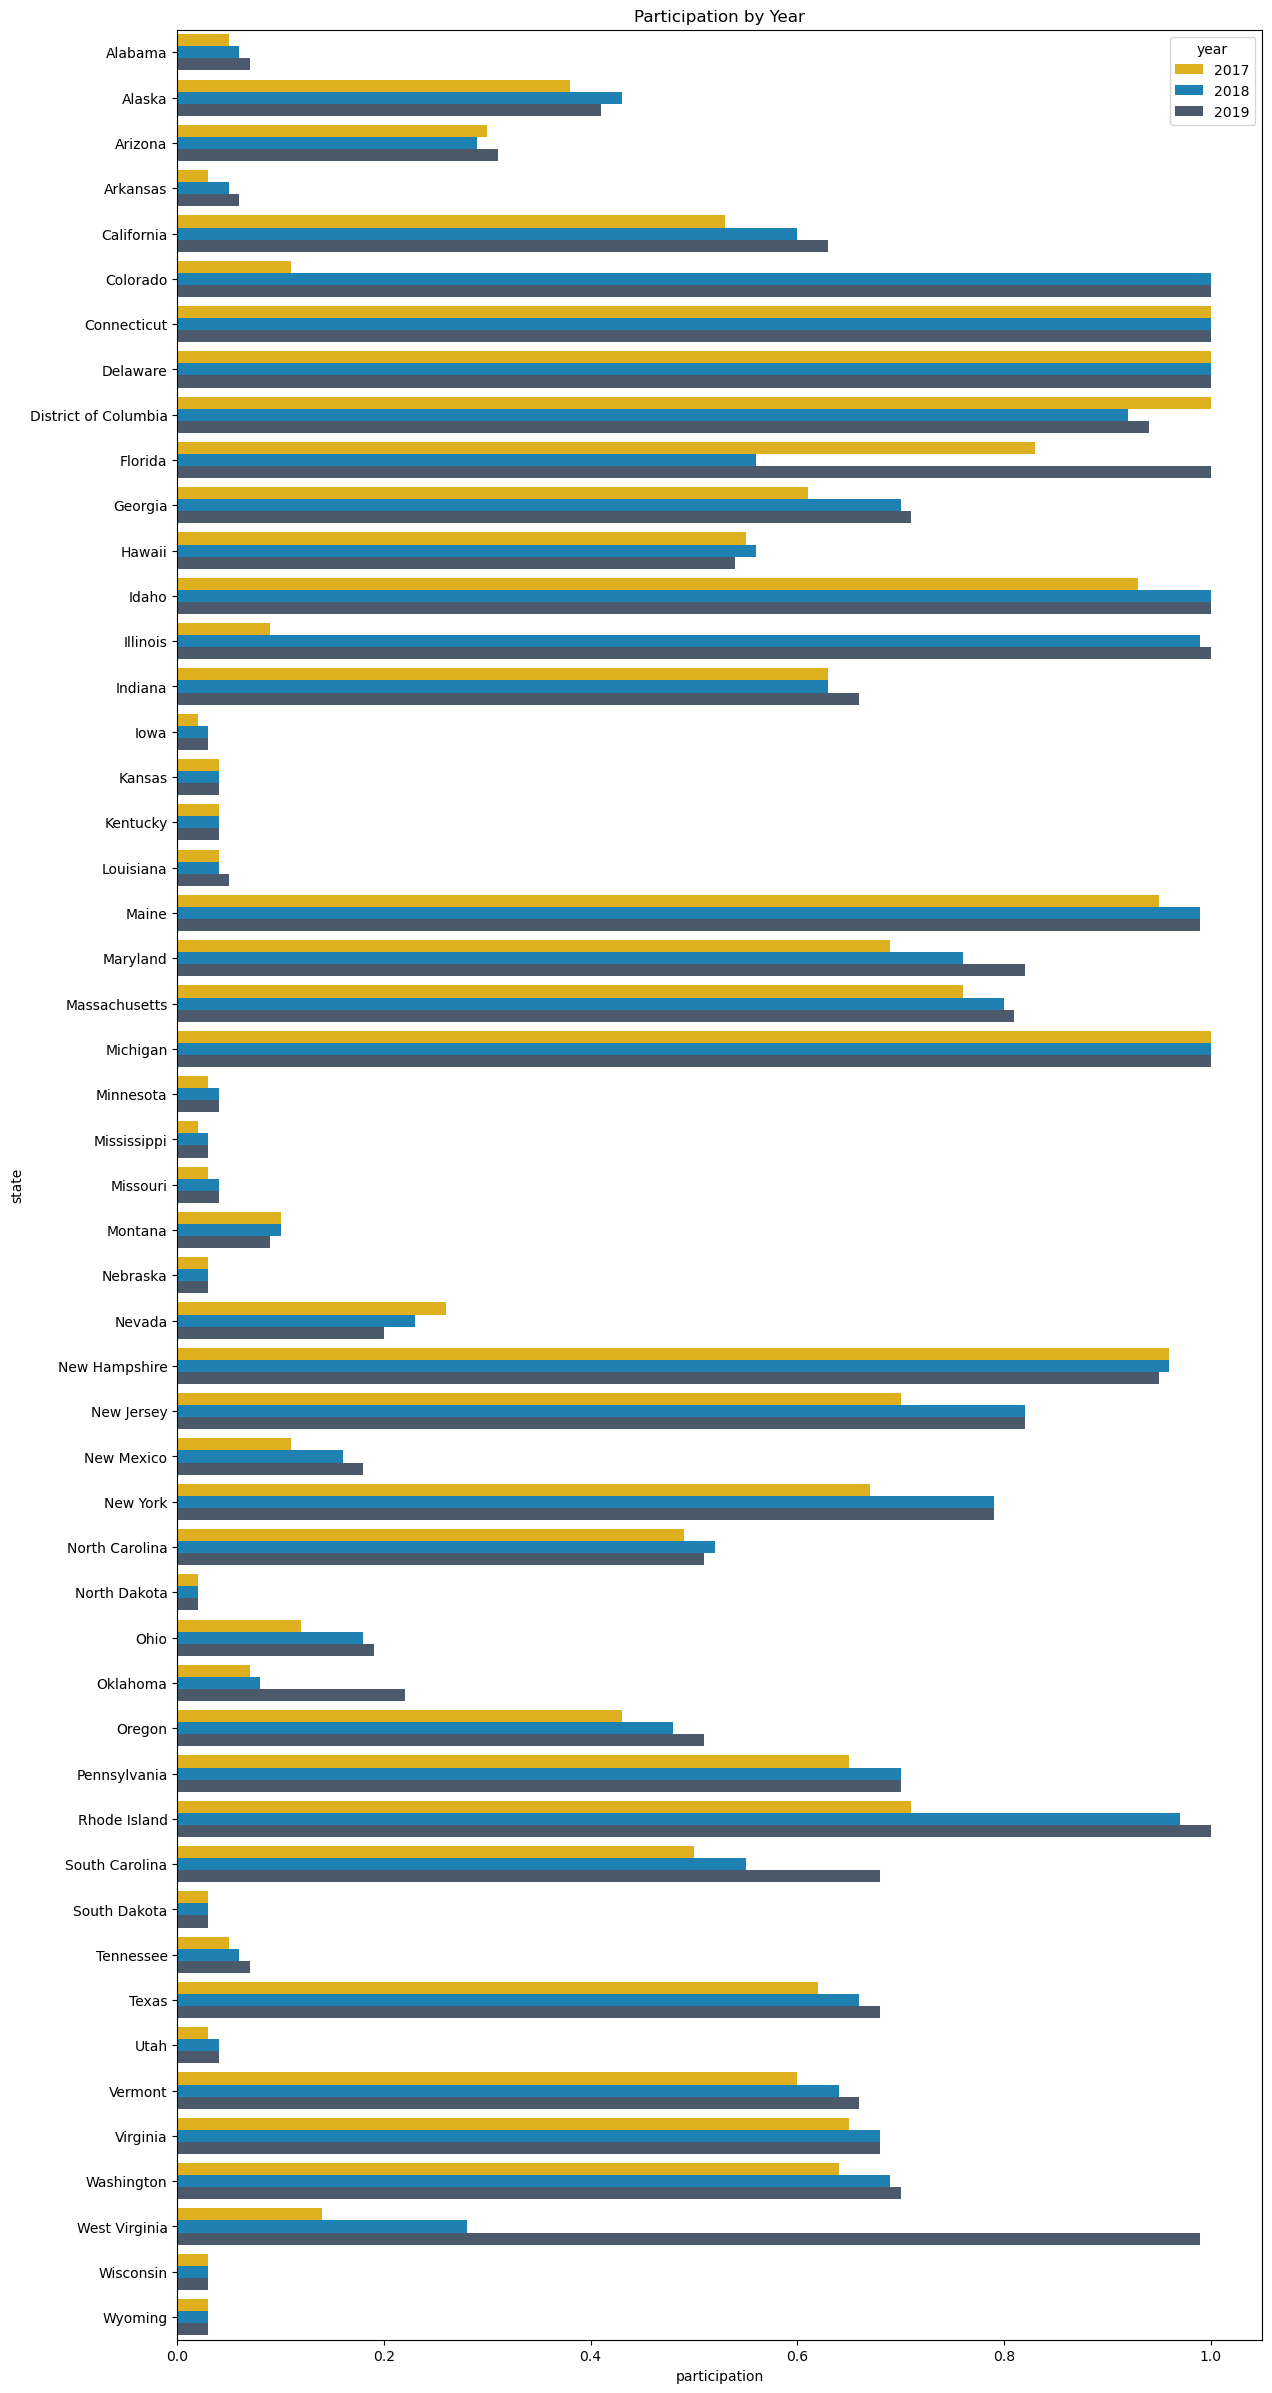

In [481]:
plt.figure(figsize=(14, 30))
palette = ['#FEC000', '#0788CA', '#46596F'] #medium blue, dark blue, teal blue #0CC9E5
sns.barplot(x='participation', y='state', data=sats, hue='year', palette=palette)
#plt.xlabel()
plt.title("Participation by Year")
plt.savefig('state_participation_count_by_year.png', format='png')
plt.show();

In [482]:
sats.sort_values('participation', ascending=False).head(10)

,state,participation,ebrw,math,total,year
109,Delaware,1.0,499,486,985,2019
111,Florida,1.0,516,483,999,2019
115,Illinois,1.0,509,504,1013,2019
114,Idaho,1.0,505,488,993,2019
56,Colorado,1.0,519,506,1025,2018
22,Michigan,1.0,509,495,1004,2017
57,Connecticut,1.0,535,519,1054,2018
58,Delaware,1.0,505,492,997,2018
63,Idaho,1.0,508,493,1001,2018
73,Michigan,1.0,511,499,1010,2018


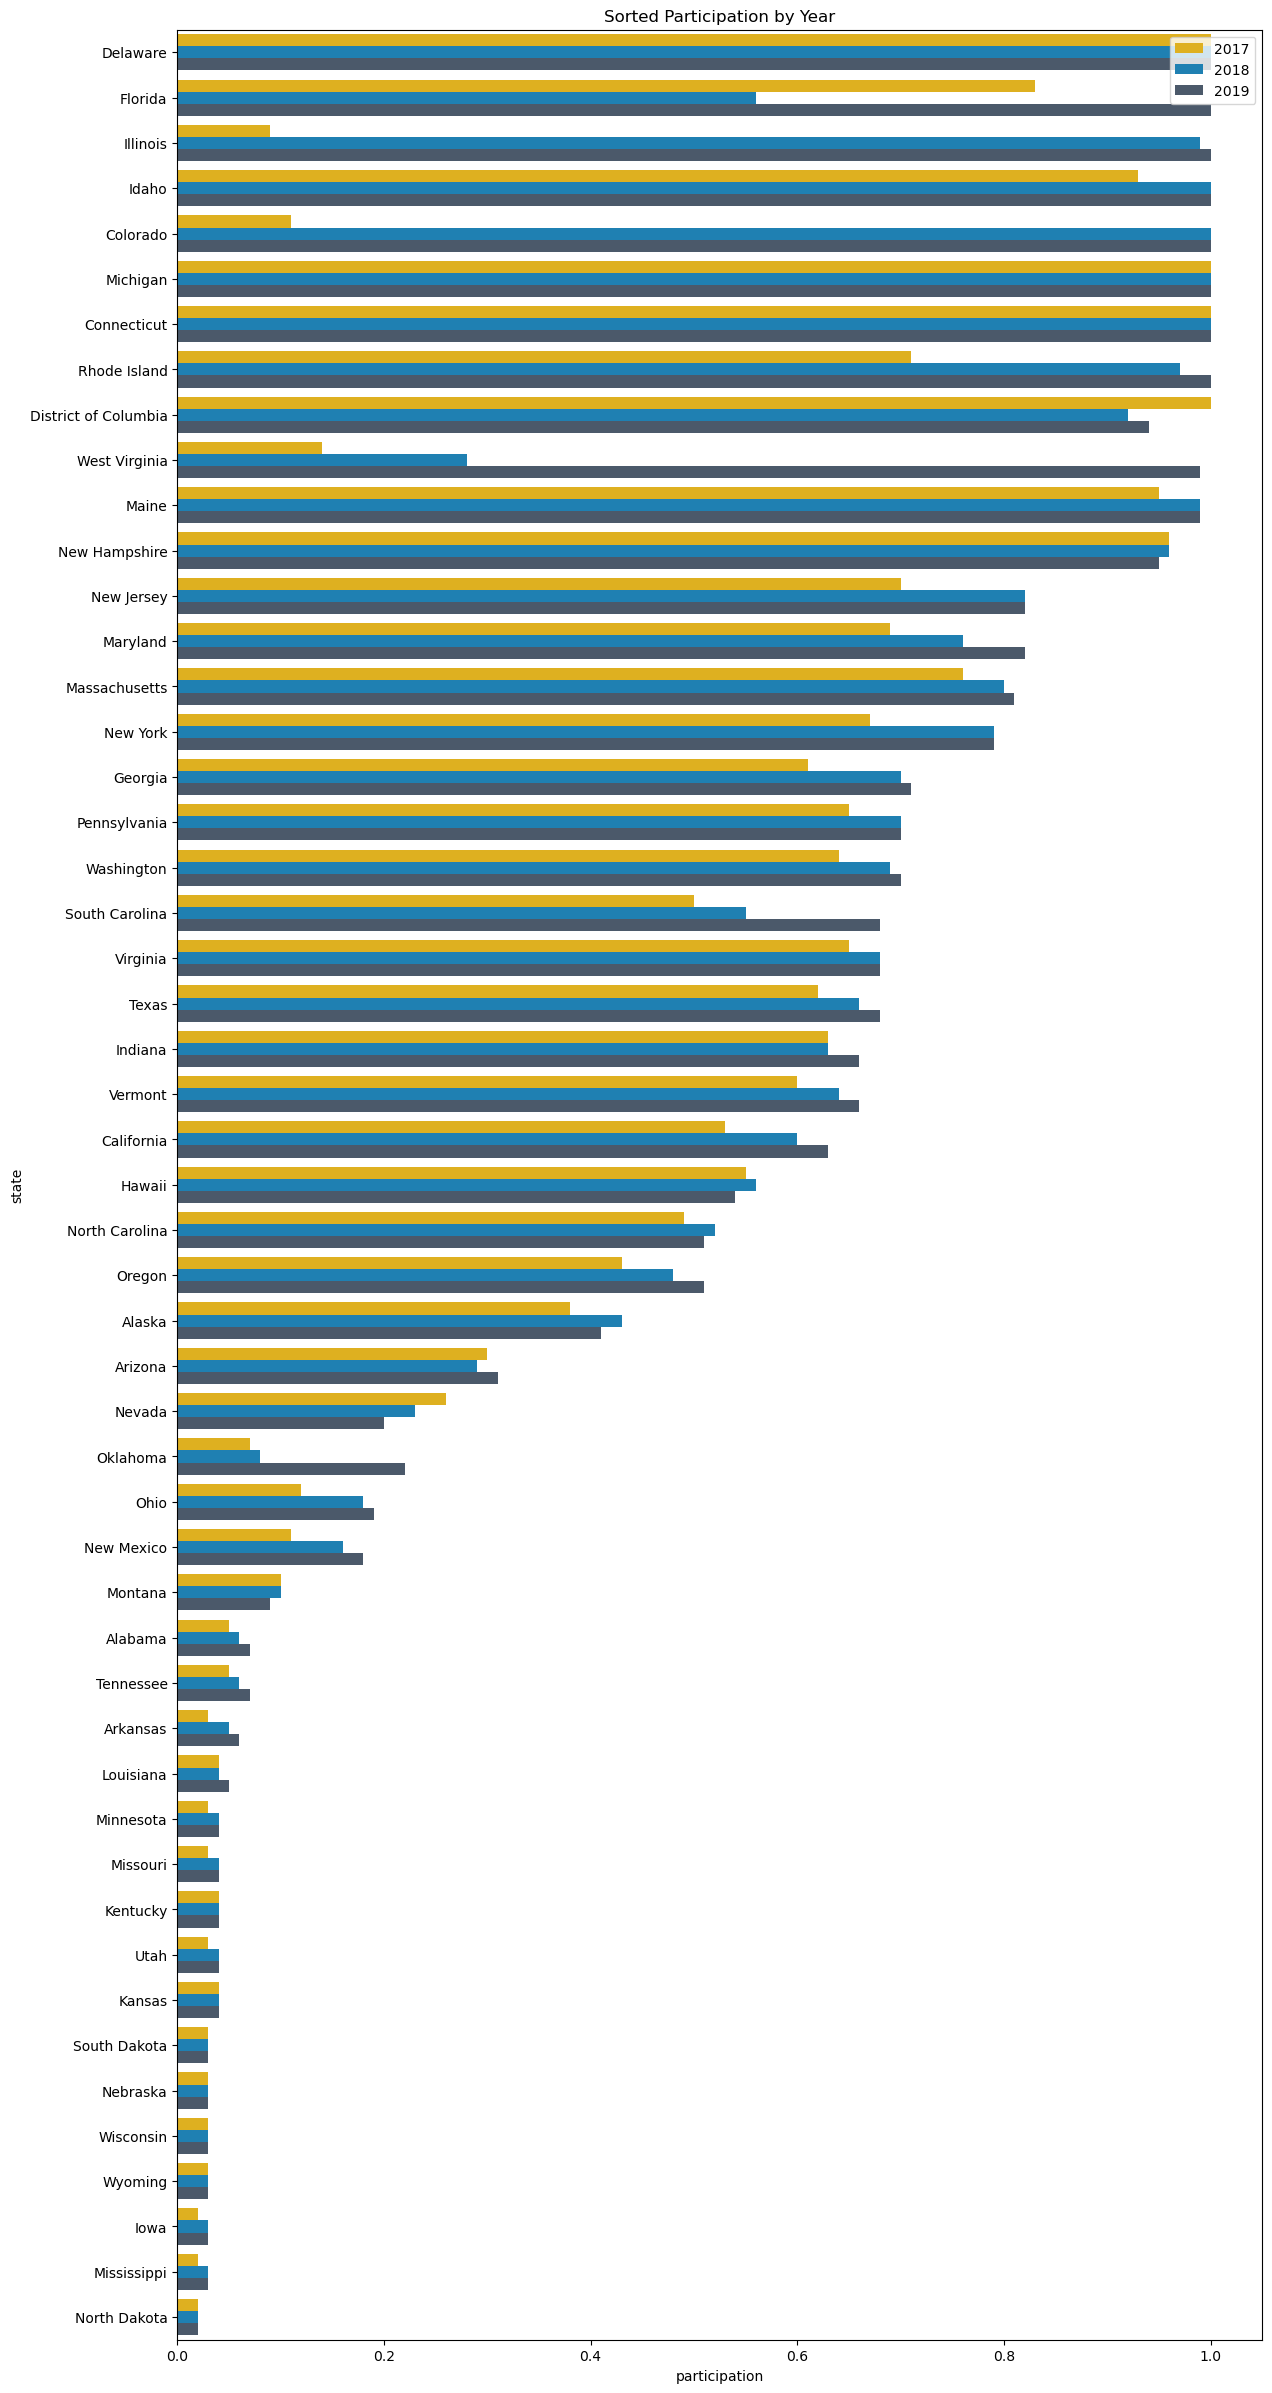

In [483]:
plt.figure(figsize=(14, 30))
palette = ['#FEC000', '#0788CA', '#46596F'] #medium blue, dark blue, teal blue #0CC9E5
sns.barplot(x='participation', y='state', data=sats.sort_values('participation', ascending=False), hue='year', palette=palette)
plt.title("Sorted Participation by Year")
plt.legend(loc='upper right') #moved legend to the upper right corner
plt.savefig('sorted_state_participation_count_by_year.png', format='png')
plt.show();

In [484]:
#filter states with greater than 80% participation
sats[(sats['participation'] > 0.8) & (sats['year']== 2019)].sort_values('participation', ascending=False)

,state,participation,ebrw,math,total,year
107,Colorado,1.00,518,506,1024,2019
108,Connecticut,1.00,529,516,1045,2019
109,Delaware,1.00,499,486,985,2019
111,Florida,1.00,516,483,999,2019
114,Idaho,1.00,505,488,993,2019
115,Illinois,1.00,509,504,1013,2019
124,Michigan,1.00,507,496,1003,2019
141,Rhode Island,1.00,503,492,995,2019
121,Maine,0.99,512,502,1014,2019
150,West Virginia,0.99,483,460,943,2019


In [485]:
sats[(sats['participation'] > 0.8) & (sats['year']== 2018)].sort_values('participation', ascending=False)

,state,participation,ebrw,math,total,year
56,Colorado,1.00,519,506,1025,2018
57,Connecticut,1.00,535,519,1054,2018
58,Delaware,1.00,505,492,997,2018
63,Idaho,1.00,508,493,1001,2018
73,Michigan,1.00,511,499,1010,2018
64,Illinois,0.99,513,506,1019,2018
70,Maine,0.99,512,501,1013,2018
90,Rhode Island,0.97,513,505,1018,2018
80,New Hampshire,0.96,535,528,1063,2018
59,District of Columbia,0.92,497,480,977,2018


In [486]:
sats[(sats['participation'] > 0.8) & (sats['year']== 2017)].sort_values('participation', ascending=False)

,state,participation,ebrw,math,total,year
6,Connecticut,1.00,530,512,1042,2017
7,Delaware,1.00,503,492,995,2017
8,District of Columbia,1.00,482,468,950,2017
22,Michigan,1.00,509,495,1004,2017
29,New Hampshire,0.96,532,520,1052,2017
19,Maine,0.95,513,499,1012,2017
12,Idaho,0.93,513,493,1006,2017
9,Florida,0.83,520,497,1017,2017


In [487]:
sats_pivot = sats[sats['participation'] > 0.8].pivot(index='state', columns='year', values='participation')
sats_pivot.sort_values(by = [2017, 2018, 2019], ascending=False).fillna('--')
# Reset the index so that 'person_name' becomes a column again
#sats = sats.reset_index(

year,2017,2018,2019
state,,,
Connecticut,1.0,1.0,1.00
Delaware,1.0,1.0,1.00
Michigan,1.0,1.0,1.00
District of Columbia,1.0,0.92,0.94
New Hampshire,0.96,0.96,0.95
Maine,0.95,0.99,0.99
Idaho,0.93,1.0,1.00
Florida,0.83,--,1.00
Colorado,--,1.0,1.00


In [488]:
sats_pivot

year,2017,2018,2019
state,,,
Colorado,NaN,1.00,1.00
Connecticut,1.00,1.00,1.00
Delaware,1.00,1.00,1.00
District of Columbia,1.00,0.92,0.94
Florida,0.83,NaN,1.00
Idaho,0.93,1.00,1.00
Illinois,NaN,0.99,1.00
Maine,0.95,0.99,0.99
Maryland,NaN,NaN,0.82


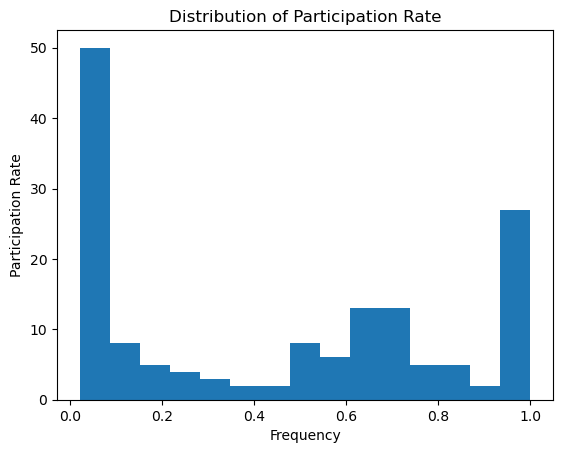

In [489]:
plt.hist(sats['participation'], bins=15);
plt.title('Distribution of Participation Rate');
plt.ylabel('Participation Rate');
plt.xlabel('Frequency');
plt.savefig('histo_participation.png', format='png')

In [490]:
# Extract unique years dynamically
sats_years = sorted(sats['year'].unique())

# Pivot the data using the dynamic list of years
sats_pivot = sats.pivot(index='state', columns='year', values='participation')

# Replace NaN values with 0 or any other value (if necessary)
sats_pivot = sats_pivot.fillna(0)

# Calculate year-over-year percentage change
sats_pct_change = sats_pivot.pct_change(axis=1) * 100

# Reset the index so that 'person_name' becomes a column again
sats_pct_change = sats_pct_change.reset_index()

# Rename columns?
sats_pct_change
sats_pct_change.to_csv('sats_pct_change.csv', index=False)

## Visualize the Data

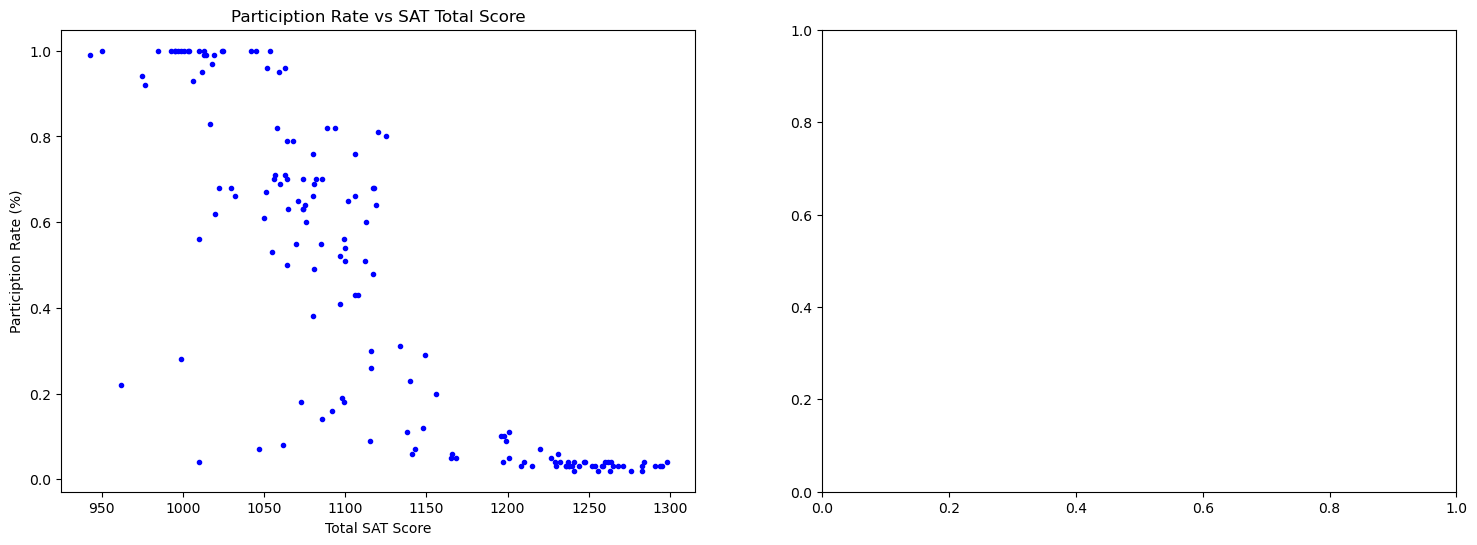

In [492]:
# Code e.g. 
# plotting scatter plot for the participation rate vs. total SAT score

fig, axs = plt.subplots(1,2, figsize=(18,6))

axs[0].plot(sats['total'], sats['participation'], 'b.');
axs[0].set_title('Particiption Rate vs SAT Total Score');
axs[0].set_ylabel('Particiption Rate (%)');
axs[0].set_xlabel('Total SAT Score');


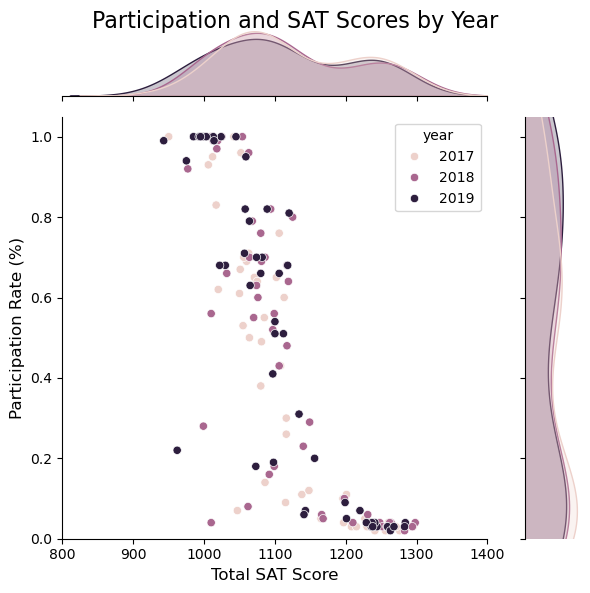

In [493]:
#create jointplot
jointplot_sat = sns.jointplot(x='total', y='participation', data=sats, hue='year')

# Add titles and axis labels
jointplot_sat.fig.suptitle('Participation and SAT Scores by Year', fontsize=16)
jointplot_sat.set_axis_labels('Total SAT Score', 'Participation Rate (%)', fontsize=12)

jointplot_sat.ax_joint.set_xlim(800, 1400)  # Set x-axis limits
jointplot_sat.ax_joint.set_ylim(0.0, 1.05)  # Set y-axis limits

# Adjust the title position to avoid overlapping
jointplot_sat.fig.tight_layout()
jointplot_sat.fig.subplots_adjust(top=0.95)
jointplot_sat.fig.savefig('jointplot_parti_and_year.png', format='png')
plt.show();


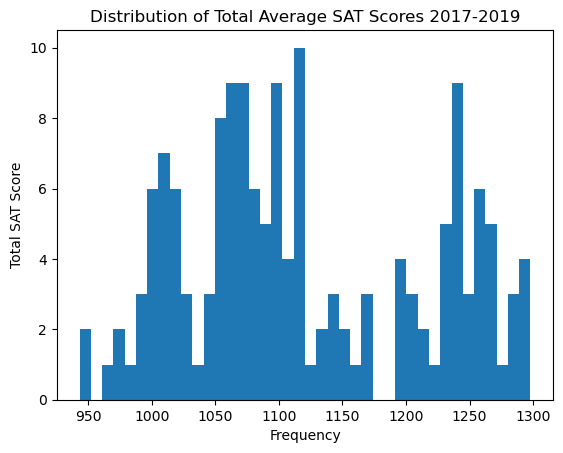

In [494]:
plt.hist(sats['total'], bins=40);
plt.title('Distribution of Total Average SAT Scores 2017-2019');
plt.ylabel('Total SAT Score');
plt.xlabel('Frequency');
plt.savefig('histo_total.png', format='png')

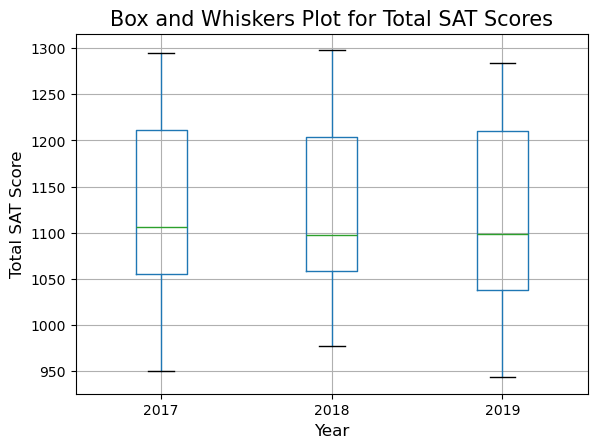

In [495]:
#create the box plot
sats.boxplot(by='year', column=['total'])

# Add title and labels
plt.title('Box and Whiskers Plot for Total SAT Scores', fontsize=15)
plt.suptitle('')  # Remove automatic suptitle
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total SAT Score', fontsize=12)
plt.savefig('box_whiskers_total_sat.png', format='png')
plt.show()

In [496]:
sats.describe()

,participation,ebrw,math,total,year
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.448693,564.535948,555.104575,1119.640523,2018.000000
std,0.370944,46.301362,48.485370,94.171150,0.819178
min,0.020000,480.000000,460.000000,943.000000,2017.000000
25%,0.040000,531.000000,521.000000,1054.000000,2017.000000
50%,0.500000,554.000000,546.000000,1099.000000,2018.000000
75%,0.760000,614.000000,596.000000,1210.000000,2019.000000
max,1.000000,644.000000,655.000000,1298.000000,2019.000000


In [500]:
df = pd.read_csv("sats_pct_change.csv")

In [504]:
df.fillna(0.0)

,state,2017,2018,2019
0,Alabama,0.0,20.000000,16.666667
1,Alaska,0.0,13.157895,-4.651163
2,Arizona,0.0,-3.333333,6.896552
3,Arkansas,0.0,66.666667,20.000000
4,California,0.0,13.207547,5.000000
5,Colorado,0.0,809.090909,0.000000
6,Connecticut,0.0,0.000000,0.000000
7,Delaware,0.0,0.000000,0.000000
8,District of Columbia,0.0,-8.000000,2.173913
9,Florida,0.0,-32.530120,78.571429


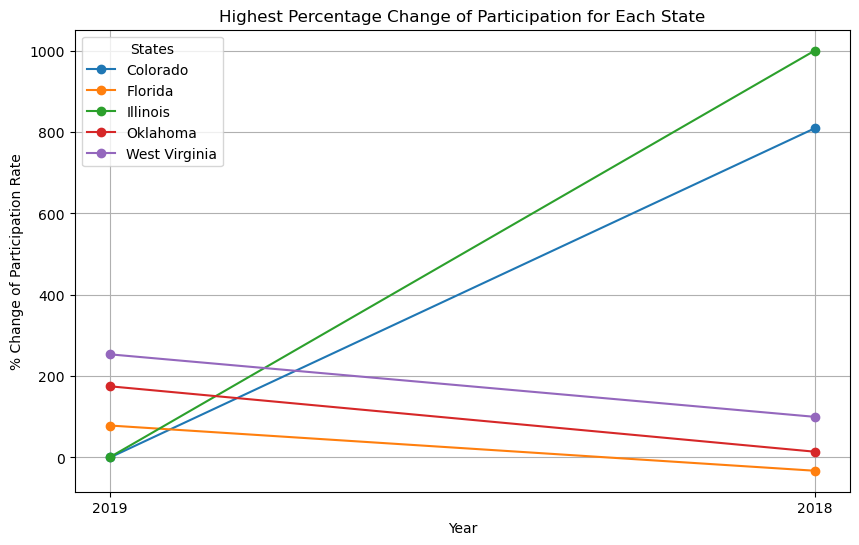

In [506]:
#df = pd.read_csv("sats_pct_change.csv")
df['change'] = (df['2019'] - df['2018']).abs()
df_select = df[df['change']>50]
df_select.count()

plt.figure(figsize=(10, 6))

for index, row in df_select.iterrows():
    plt.plot(['2019', '2018'], [row['2019'], row['2018']], marker='o', label=row['state'])

plt.title('Highest Percentage Change of Participation for Each State')
plt.xlabel('Year')
plt.ylabel('% Change of Participation Rate')
plt.legend(title='States')
plt.grid(True)
plt.show()

In [508]:
sats[sats["year"] == 2018]["state"]

51                  Alabama
52                   Alaska
53                  Arizona
54                 Arkansas
55               California
56                 Colorado
57              Connecticut
58                 Delaware
59     District of Columbia
60                  Florida
61                  Georgia
62                   Hawaii
63                    Idaho
64                 Illinois
65                  Indiana
66                     Iowa
67                   Kansas
68                 Kentucky
69                Louisiana
70                    Maine
71                 Maryland
72            Massachusetts
73                 Michigan
74                Minnesota
75              Mississippi
76                 Missouri
77                  Montana
78                 Nebraska
79                   Nevada
80            New Hampshire
81               New Jersey
82               New Mexico
83                 New York
84           North Carolina
85             North Dakota
86                 O

In [510]:
sats[sats['state']=='Illinois']

,state,participation,ebrw,math,total,year
13,Illinois,0.09,559,556,1115,2017
64,Illinois,0.99,513,506,1019,2018
115,Illinois,1.00,509,504,1013,2019


In [512]:
sats[sats['state']=='Colorado']

,state,participation,ebrw,math,total,year
5,Colorado,0.11,606,595,1201,2017
56,Colorado,1.00,519,506,1025,2018
107,Colorado,1.00,518,506,1024,2019


In [514]:
#sats_pct_change[2019].sort_values(ascending=False)
sats_pct_change.sort_values(2019, ascending=False).head(10).round(2)

year,state,2017,2018,2019
48,West Virginia,NaN,100.00,253.57
36,Oklahoma,NaN,14.29,175.00
9,Florida,NaN,-32.53,78.57
18,Louisiana,NaN,0.00,25.00
40,South Carolina,NaN,10.00,23.64
3,Arkansas,NaN,66.67,20.00
0,Alabama,NaN,20.00,16.67
42,Tennessee,NaN,20.00,16.67
31,New Mexico,NaN,45.45,12.50
20,Maryland,NaN,10.14,7.89


## Conclusions and Recommendations

Based on the exploration of the data, the key takeaway is to keep the test centers with consistently high total scores and participation for the Northeastern states. States with a steep positive increase in participation percentage growth are explainable by regulation changes. Other factors in addition to participation rate must be explored to give a better understanding of the increase, such as introducing a new service such as the free Khan Academy Revision service. 